C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_14456\3694664076.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passing_attempts['pass_distance_category'] = pd.cut(passing_attempts['air_yards'], bins=bins, labels=labels)
C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_14456\3694664076.py:233: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pass_distance_summary = passing_attempts.groupby('pass_distance_category').agg({
C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_14456\3694664076.py:384: FutureWarning: Downcasting behavior in `re

Throwing summary saved as: throwing_scorecards/2024/week20\Josh_Allen_2024_BUF_week20.jpg


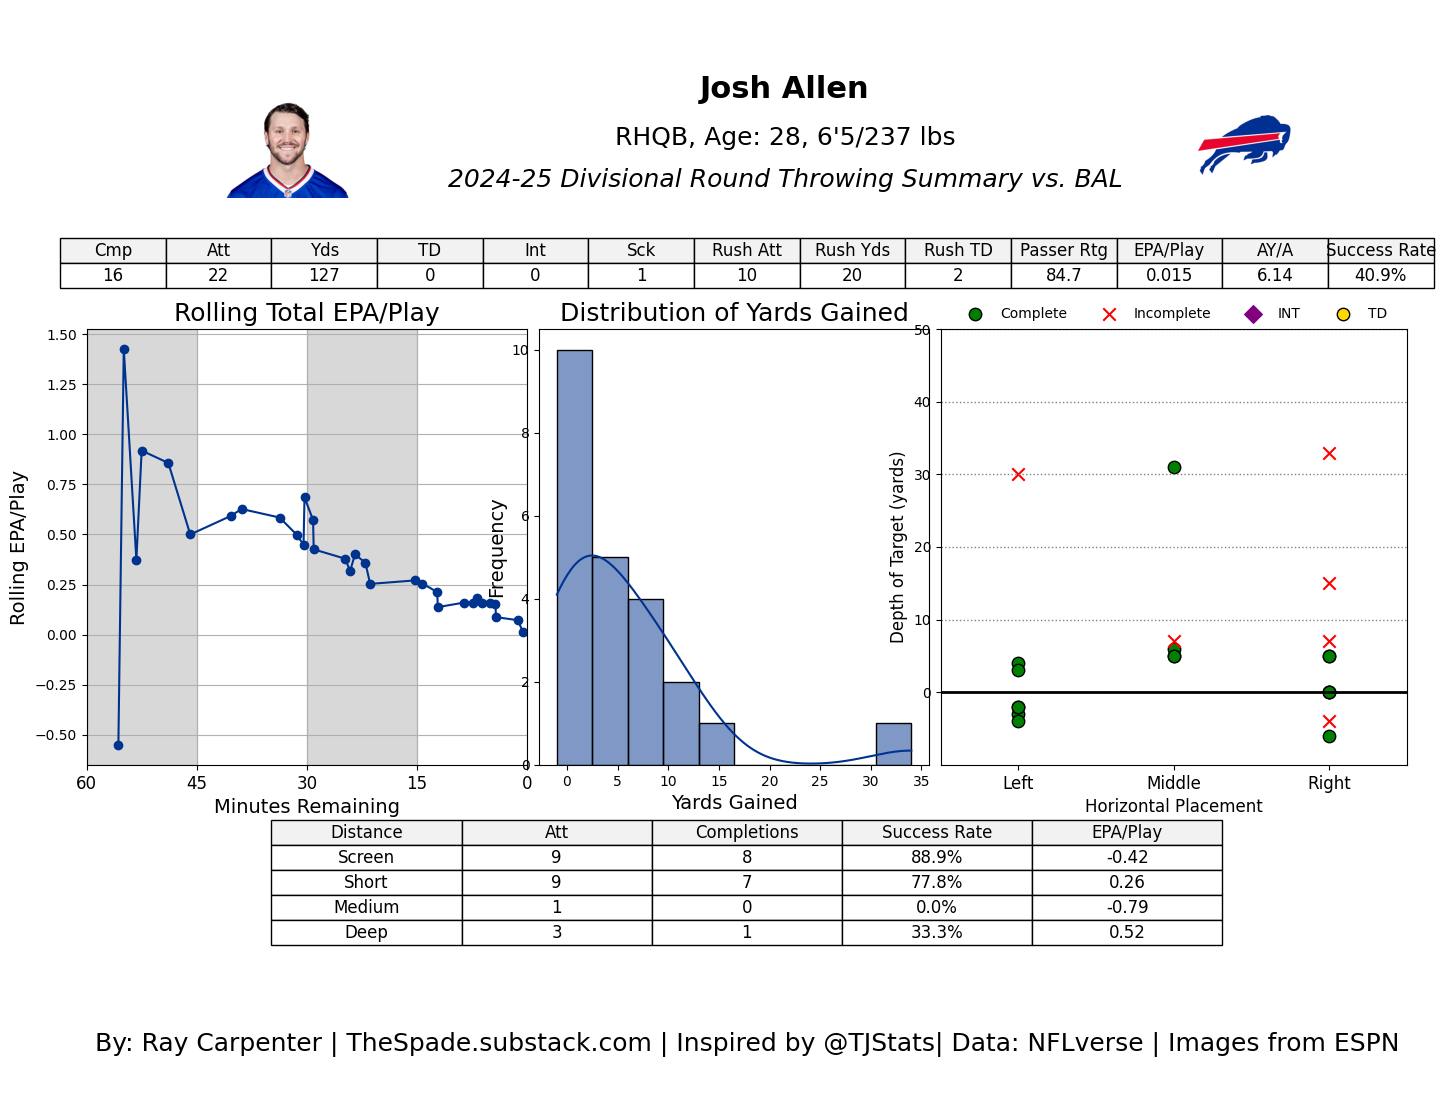

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import requests
from io import BytesIO
from PIL import Image
from datetime import datetime
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define the year and load the data
YEAR = 2024
url = f'https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_{YEAR}.csv.gz'
data = pd.read_csv(url, compression='gzip', low_memory=False)

# Set options for displaying dataframes
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

# Function to get an image from ESPN based on player_id
def get_espn_headshot(player_id: str):
    url = f'https://a.espncdn.com/combiner/i?img=/i/headshots/nfl/players/full/{player_id}.png'
    response = requests.get(url)
    
    if response.status_code == 200:
        return Image.open(BytesIO(response.content))
    else:
        print(f"Could not retrieve headshot for player {player_id}")
        return None

def player_headshot(player_id: str, ax: plt.Axes):
    headshot = get_espn_headshot(player_id)
    if headshot:
        ax.imshow(headshot)
        ax.axis('off')
    else:
        ax.text(0.5, 0.5, 'No Image', ha='center', va='center', fontsize=12)
        ax.axis('off')

# Load the quarterback information from qb_info.csv
qb_info = pd.read_csv('C:/Users/RaymondCarpenter/Documents/GitHub/nfl_throwing_scorecard/qb_info.csv')

# Accept player_name and week number input from the user
player_name = input("Enter the player's name: ")
week_number_input = int(input("Enter the week number: "))

# Retrieve player info based on player name
player_info = qb_info[qb_info['Name'] == player_name].iloc[0]
formatted_player_name = player_info['data_formatted_player_name']
player_team = player_info['Team']

# Filter data to include only the player's team's games in the specified week
filtered_df = data[((data['home_team'] == player_team) | (data['away_team'] == player_team)) & (data['week'] == week_number_input)]
if filtered_df.empty:
    print(f"No data found for {player_name} in week {week_number_input}.")
    exit()

# Determine the game date based on the filtered data
game_date = pd.to_datetime(filtered_df['game_date'].iloc[0])
player_birthday = pd.to_datetime(player_info['Birthday'], format='%m/%d/%Y')
player_age = (game_date - player_birthday).days // 365  # Calculate age in years

# Get the player ID from the CSV and use it to fetch the headshot
player_id = player_info['player_id']
headshot = get_espn_headshot(player_id)

# NFL team logo URLs
nfl_teams = [
    {"team": "ARI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ari.png&h=500&w=500","hex": "#97233F"},
    {"team": "ATL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/atl.png&h=500&w=500","hex": "#a71930"},
    {"team": "BAL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/bal.png&h=500&w=500","hex": "#241773"},
    {"team": "BUF", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/buf.png&h=500&w=500","hex": "#00338D"},
    {"team": "CAR", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/car.png&h=500&w=500","hex": "#0085CA"},
    {"team": "CHI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/chi.png&h=500&w=500","hex": "#0B162A"},
    {"team": "CIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/cin.png&h=500&w=500","hex": "#fb4f14"},
    {"team": "CLE", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/cle.png&h=500&w=500","hex": "#311D00"},
    {"team": "DAL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/dal.png&h=500&w=500","hex": "#041E42"},
    {"team": "DEN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/den.png&h=500&w=500","hex": "#FB4F14"},
    {"team": "DET", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/det.png&h=500&w=500","hex": "#0076b6"},
    {"team": "GB", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/gb.png&h=500&w=500","hex": "#203731"},
    {"team": "HOU", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/hou.png&h=500&w=500","hex": "#03202f"},
    {"team": "IND", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ind.png&h=500&w=500","hex": "#002C5F"},
    {"team": "JAX", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/jax.png&h=500&w=500","hex": "#006778"},
    {"team": "KC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/kc.png&h=500&w=500","hex": "#E31837"},
    {"team": "LAC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lac.png&h=500&w=500","hex": "#0080C6"},
    {"team": "LA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lar.png&h=500&w=500","hex": "#003594"},
    {"team": "MIA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/mia.png&h=500&w=500","hex": "#008E97"},
    {"team": "MIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/min.png&h=500&w=500","hex": "#4F2683"},
    {"team": "NE", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ne.png&h=500&w=500","hex": "#002244"},
    {"team": "NO", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/no.png&h=500&w=500","hex": "#000000"},
    {"team": "NYG", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/nyg.png&h=500&w=500","hex": "#0B2265"},
    {"team": "NYJ", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/nyj.png&h=500&w=500","hex": "#125740"},
    {"team": "LV", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/lv.png&h=500&w=500","hex": "#000000"},
    {"team": "PHI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/phi.png&h=500&w=500","hex": "#004C54"},
    {"team": "PIT", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/pit.png&h=500&w=500","hex": "#000000"},
    {"team": "SF", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/sf.png&h=500&w=500","hex": "#AA0000"},
    {"team": "SEA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/sea.png&h=500&w=500","hex": "#002244"},
    {"team": "TB", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/tb.png&h=500&w=500","hex": "#D50A0A"},
    {"team": "TEN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/ten.png&h=500&w=500","hex": "#0C2340"},
    {"team": "WAS", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/nfl/500/was.png&h=500&w=500","hex": "#5A1414"}
]

nfl_logo_dict = {team['team']: team['logo_url'] for team in nfl_teams}

def get_team_logo(team_abb: str):
    team_abb = team_abb.strip().upper()
    logo_url = nfl_logo_dict.get(team_abb, None)
    if logo_url:
        response = requests.get(logo_url)
        if response.status_code == 200:
            return Image.open(BytesIO(response.content))
        else:
            print(f"Failed to retrieve logo for {team_abb}")
    else:
        print(f"No logo URL found for {team_abb}")
    return None

# Determine if the player is home or away
game_row = filtered_df.iloc[0]
if game_row['home_team'] == player_team:
    home_team = player_team
    away_team = game_row['away_team']
    bio_text_location = f"vs. {away_team}"
else:
    home_team = game_row['home_team']
    away_team = player_team
    bio_text_location = f"@ {home_team}"

# Construct the game_id dynamically
game_id = f'{YEAR}_{week_number_input:02d}_{away_team}_{home_team}'

# Separate filters for passing and rushing plays
passing_plays = filtered_df[filtered_df['passer_player_name'] == formatted_player_name] 
rushing_plays = filtered_df[filtered_df['rusher_player_name'] == formatted_player_name]

# Filter game data by game id but include sacks this time
game_data_passing = passing_plays[
    (passing_plays['game_id'] == game_id) & 
    (passing_plays['pass_attempt'] == 1)
]

# Create a new column to identify sack plays
game_data_passing['is_sack'] = game_data_passing['sack'] == 1.0

# Separate passing attempts and sacks
passing_attempts = game_data_passing[~game_data_passing['is_sack']]
sacks = game_data_passing[game_data_passing['is_sack']]

# Calculate total sacks and adjusted passing attempts (excluding sacks)
total_sacks = len(sacks)
adjusted_attempts = len(passing_attempts)

# Calculate cumulative completions and attempts for passing plays
game_data_passing['cumulative_completions'] = game_data_passing['complete_pass'].cumsum()
game_data_passing['cumulative_attempts'] = game_data_passing['pass_attempt'].cumsum()
game_data_passing['cumulative_completion_percentage'] = (
    game_data_passing['cumulative_completions'] / game_data_passing['cumulative_attempts']
) * 100

# Sum EPA for both passing and rushing plays
total_passing_epa = passing_attempts['epa'].sum()
total_rushing_epa = rushing_plays['epa'].sum() 
total_epa = total_passing_epa + total_rushing_epa

# Sum the total number of plays (passing attempts + rushing attempts)
total_plays = adjusted_attempts + rushing_plays['rush_attempt'].sum()
epa_per_play = round(total_epa / total_plays, 3) if total_plays > 0 else 0

air_yards_per_attempt = round(
    passing_attempts['air_yards'].sum() / adjusted_attempts, 2
) if adjusted_attempts > 0 else 0

success_rate = round(
    passing_attempts[passing_attempts['epa'] > 0].shape[0] / passing_attempts.shape[0] * 100, 1
) if passing_attempts.shape[0] > 0 else 0

# Calculate passer rating
completions = passing_attempts['complete_pass'].sum()
attempts = adjusted_attempts
yards = passing_attempts['passing_yards'].sum()
touchdowns = passing_attempts['pass_touchdown'].sum()
interceptions = passing_attempts['interception'].sum()

if attempts > 0:
    comp_pct = completions / attempts
    avg_yards = yards / attempts
    td_pct = touchdowns / attempts
    int_pct = interceptions / attempts
    passer_rating = (comp_pct * 5 + avg_yards * 0.25 + td_pct * 20 - int_pct * 25) / 6 * 100
    passer_rating = round(passer_rating, 1)
else:
    passer_rating = 0


combined_plays = pd.concat([
    passing_attempts[['play_id', 'epa', 'game_seconds_remaining', 'qtr']],
    rushing_plays[['play_id', 'epa', 'game_seconds_remaining', 'qtr']]
])
combined_plays.sort_values('play_id', inplace=True)
combined_plays['rolling_total_epa'] = combined_plays['epa'].cumsum()
combined_plays['rolling_play_count'] = range(1, len(combined_plays) + 1)
combined_plays['rolling_epa_per_play'] = combined_plays['rolling_total_epa'] / combined_plays['rolling_play_count']

combined_plays['is_overtime'] = combined_plays['qtr'] == 5

# Adjust minutes_remaining to handle overtime
combined_plays['minutes_remaining'] = combined_plays['game_seconds_remaining'] / 60
combined_plays.loc[combined_plays['is_overtime'], 'minutes_remaining'] = (
    -combined_plays.loc[combined_plays['is_overtime'], 'game_seconds_remaining'] / 60
)


# Determine play IDs for quarter lines using game_seconds_remaining
quarter_end_times = [3600, 2700, 1800, 900]
quarter_positions = []

for end_time in quarter_end_times:
    try:
        play_id = combined_plays[combined_plays['game_seconds_remaining'] <= end_time].iloc[0]['play_id']
        if play_id not in quarter_positions:
            quarter_positions.append(play_id)
    except IndexError:
        continue

# Create bins for pass distances
bins = [-np.inf, 1, 10, 25, np.inf]
labels = ['Screen', 'Short', 'Medium', 'Deep']
passing_attempts['pass_distance_category'] = pd.cut(passing_attempts['air_yards'], bins=bins, labels=labels)

# Calculate success rate, EPA/play, attempts, and completions for each category
pass_distance_summary = passing_attempts.groupby('pass_distance_category').agg({
    'pass_attempt': 'sum',
    'complete_pass': 'sum',
    'epa': 'sum'
}).reset_index()

pass_distance_summary['pass_distance_category'] = pass_distance_summary['pass_distance_category'].astype(object)
pass_distance_summary['EPA/Play'] = (pass_distance_summary['epa'] / pass_distance_summary['pass_attempt']).round(2)
pass_distance_summary['Success Rate'] = (pass_distance_summary['complete_pass'] / pass_distance_summary['pass_attempt']) * 100
pass_distance_summary.fillna(0, inplace=True)

pass_distance_summary = pass_distance_summary[['pass_distance_category', 'pass_attempt', 'complete_pass', 'Success Rate', 'EPA/Play']]
pass_distance_summary.columns = ['Distance', 'Att', 'Completions', 'Success Rate', 'EPA/Play']
pass_distance_summary['Att'] = pass_distance_summary['Att'].astype(int)
pass_distance_summary['Completions'] = pass_distance_summary['Completions'].astype(int)
pass_distance_summary['Success Rate'] = pass_distance_summary['Success Rate'].apply(lambda x: f"{x:.1f}%")

rush_attempts = rushing_plays['rush_attempt'].sum()
rush_yards = rushing_plays['rushing_yards'].sum()
rush_touchdowns = rushing_plays['rush_touchdown'].sum()
rush_attempts = rush_attempts if rush_attempts > 0 else 0
rush_yards = rush_yards if rush_yards > 0 else 0
rush_touchdowns = rush_touchdowns if rush_touchdowns > 0 else 0

# Summary table including sacks and adjusted attempts
summary_table = {
    'Cmp': [int(passing_attempts['complete_pass'].sum())],
    'Att': [adjusted_attempts],  # Adjusted passing attempts excluding sacks
    'Yds': [int(passing_attempts['passing_yards'].sum())],
    'TD': [int(passing_attempts['pass_touchdown'].sum())],
    'Int': [int(passing_attempts['interception'].sum())],
    'Sck': [total_sacks],
    'Rush Att': [int(rush_attempts)],        
    'Rush Yds': [int(rush_yards)],           
    'Rush TD': [int(rush_touchdowns)],       
    'Passer Rtg': [passer_rating],
    'EPA/Play': [epa_per_play],              
    'AY/A': [air_yards_per_attempt],
    'Success Rate': [f"{success_rate}%"]
}

summary_df = pd.DataFrame.from_dict(summary_table)

def qb_dashboard(game_data_passing: pd.DataFrame, headshot: Image, summary_df: pd.DataFrame, pass_distance_summary: pd.DataFrame, quarter_positions, save_path: str = None):
    team_abb = player_info['Team']
    fig = plt.figure(figsize=(18, 14))  

    gs = gridspec.GridSpec(6, 20, 
                           height_ratios=[3, 6, 4, 25, 10, 5],  
                           width_ratios=[1, 5, 1, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 5, 1, 5, 1, 3, 1, 1])  

    ax_headshot = fig.add_subplot(gs[1, 1:6])  
    ax_bio = fig.add_subplot(gs[1, 6:14])  
    ax_logo = fig.add_subplot(gs[1, 14:19])  
    ax_summary_table = fig.add_subplot(gs[2, 1:19])

    ax_rolling_epa = fig.add_subplot(gs[3, 1:7])  
    ax_yards_dist = fig.add_subplot(gs[3, 7:13])  
    ax_passing_chart = fig.add_subplot(gs[3, 13:19])  
    ax_pass_distance = fig.add_subplot(gs[4, 1:19])  
    ax_footer = fig.add_subplot(gs[-1, 1:19])  
    ax_left = fig.add_subplot(gs[:, 0])
    ax_right = fig.add_subplot(gs[:, -1])

    ax_footer.axis('off')
    ax_left.axis('off')
    ax_right.axis('off')

    player_headshot(player_id, ax_headshot)

    team_logo = get_team_logo(team_abb)
    ax_logo.clear()  
    if team_logo:
        ax_logo.imshow(team_logo, aspect='equal')
        ax_logo.axis('off')  
    else:
        ax_logo.text(0.5, 0.5, 'No Logo', ha='center', va='center', fontsize=12)

    player_height = player_info['Height']       
    player_weight = player_info['Weight'] 
    ax_bio.text(0.5, 0.95, player_name, fontsize=22, ha='center', fontweight='bold')  
    ax_bio.text(0.5, 0.50, f'{player_info["dexterity"]}HQB, Age: {player_age}, {player_height}/{player_weight} lbs', fontsize=18, ha='center')  
    summary_type = (
    "Wild Card Throwing Summary" if week_number_input == 19 else
    "Divisional Round Throwing Summary" if week_number_input == 20 else
    "Conference Championship Throwing Summary" if week_number_input == 21 else
    "Super Bowl Throwing Summary" if week_number_input == 22 else
    f"Week {week_number_input} Throwing Summary"
)
    ax_bio.text(0.5, 0.1, f'{YEAR}-25 {summary_type} {bio_text_location}', fontsize=18, ha='center', fontstyle='italic')

    ax_bio.axis('off')

    ax_summary_table.axis('off')
    table = ax_summary_table.table(cellText=summary_df.values,
                                   colLabels=summary_df.columns,
                                   cellLoc='center',
                                   loc='center',
                                   colColours=['#f2f2f2'] * len(summary_df.columns),
                                   colWidths=[0.1] * len(summary_df.columns))  
    table.auto_set_font_size(False)
    table.set_fontsize(12) 
    table.scale(0.8, 1.5)

    team_hex_color = [team['hex'] for team in nfl_teams if team['team'] == player_team][0]
# Adjust minutes_remaining for overtime (regulation time is 0-60, overtime starts at -15, -30, etc.)
    combined_plays['adjusted_minutes_remaining'] = combined_plays['game_seconds_remaining'] / 60
    combined_plays.loc[combined_plays['is_overtime'], 'adjusted_minutes_remaining'] = (
    combined_plays.loc[combined_plays['is_overtime'], 'game_seconds_remaining'] / 60 - 15
)

# Plot rolling EPA with adjusted minutes_remaining
    ax_rolling_epa.plot(
    combined_plays['adjusted_minutes_remaining'], 
    combined_plays['rolling_epa_per_play'], 
    marker='o', linestyle='-', color=team_hex_color
)

# Define boundaries for shading (adjusting for overtime)
    quarter_boundaries = [60, 45, 30, 15, 0]
    if combined_plays['adjusted_minutes_remaining'].min() < 0:  # If there's overtime
        overtime_min = combined_plays['adjusted_minutes_remaining'].min()
        quarter_boundaries.append(overtime_min)

# Apply shading for regulation and overtime periods
    for i in range(len(quarter_boundaries) - 1):
        ax_rolling_epa.axvspan(
            quarter_boundaries[i + 1], 
            quarter_boundaries[i], 
        color='gray' if i % 2 == 0 else 'white', 
        alpha=0.3
    )

# Reverse the x-axis: Regulation (60 to 0), Overtime (OT-1, OT-2, ...)
    ax_rolling_epa.set_xlim(quarter_boundaries[0], quarter_boundaries[-1])
    xticks = quarter_boundaries[::-1]
    xticklabels = [str(int(tick)) if tick >= 0 else f"OT{-int(abs(tick)/15)}" for tick in quarter_boundaries[::-1]]
    ax_rolling_epa.set_xticks(xticks)
    ax_rolling_epa.set_xticklabels(xticklabels, fontsize=12)

# Set other plot details
    ax_rolling_epa.set_xlabel('Minutes Remaining', fontdict={'size': 14})
    ax_rolling_epa.set_ylabel('Rolling EPA/Play', fontdict={'size': 14})
    ax_rolling_epa.set_title('Rolling Total EPA/Play', fontdict={'size': 18})
    ax_rolling_epa.grid(True)

    sns.histplot(game_data_passing['yards_gained'], bins=10, kde=True, color=team_hex_color, ax=ax_yards_dist)
    ax_yards_dist.set_xlabel('Yards Gained', fontdict={'size': 14})
    ax_yards_dist.set_ylabel('Frequency', fontdict={'size': 14})
    ax_yards_dist.set_title('Distribution of Yards Gained', fontdict={'size': 18})

    game_data_passing['x'] = game_data_passing['pass_location'].replace({'left': -1, 'middle': 0, 'right': 1})
    game_data_passing['y'] = game_data_passing['air_yards']

    complete = game_data_passing[game_data_passing['complete_pass'] == 1]
    incomplete = game_data_passing[game_data_passing['complete_pass'] == 0]
    interceptions = game_data_passing[game_data_passing['interception'] == 1]
    touchdowns = game_data_passing[game_data_passing['pass_touchdown'] == 1]

    ax_passing_chart.scatter(complete['x'], complete['y'], color='green', label='Complete', s=80, edgecolor='black')
    ax_passing_chart.scatter(incomplete['x'], incomplete['y'], color='red', marker='x', label='Incomplete', s=80)
    ax_passing_chart.scatter(interceptions['x'], interceptions['y'], color='purple', marker='D', label='INT', s=80)
    ax_passing_chart.scatter(touchdowns['x'], touchdowns['y'], color='gold', marker='o', label='TD', s=80, edgecolor='black')

    for y in range(0, 51, 10):
        ax_passing_chart.axhline(y, color='gray', linestyle=':', linewidth=1)

    ax_passing_chart.axhline(0, color='black', linewidth=2)  
    ax_passing_chart.set_xlim(-1.5, 1.5)
    ax_passing_chart.set_ylim(-10, 50)
    ax_passing_chart.set_xticks([-1, 0, 1])
    ax_passing_chart.set_xticklabels(['Left', 'Middle', 'Right'], fontsize=12)
    ax_passing_chart.set_yticks(range(0, 51, 10))
    ax_passing_chart.set_xlabel('Horizontal Placement', fontsize=12)
    ax_passing_chart.set_ylabel('Depth of Target (yards)', fontsize=12)

    ax_passing_chart.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4, fontsize=10, frameon=False)

    ax_pass_distance.axis('off')
    pass_distance_table = ax_pass_distance.table(
        cellText=pass_distance_summary.values,
        colLabels=pass_distance_summary.columns,
        cellLoc='center',
        loc='center',
        colColours=['#f2f2f2'] * len(pass_distance_summary.columns),
        colWidths=[0.18] * len(pass_distance_summary.columns)  
    )
    pass_distance_table.auto_set_font_size(False)
    pass_distance_table.set_fontsize(12)  
    pass_distance_table.scale(.8, 1.5)  

    ax_footer.text(0.5, 0.5, 'By: Ray Carpenter | TheSpade.substack.com | Inspired by @TJStats| Data: NFLverse | Images from ESPN', 
                   ha='center', va='center', fontsize=18)

    plt.tight_layout(pad=1.5) 

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

week_folder = f'throwing_scorecards/{YEAR}/week{week_number_input}'
os.makedirs(week_folder, exist_ok=True)

save_file_name = f"{player_name.replace(' ', '_')}_{YEAR}_{player_team}_week{week_number_input}.jpg"
save_path = os.path.join(week_folder, save_file_name)

qb_dashboard(game_data_passing, headshot, summary_df, pass_distance_summary, quarter_positions, save_path=save_path)

print(f"Throwing summary saved as: {save_path}") 